In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Preparing the Data

In [2]:
df = pd.read_csv('usa_00001.csv')
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2021,202101,2079,2021010124973,8424.0,2021000020791,270301,4,1,8424.0,...,200,0,0,7,71,1,10,10000,1,11
1,2021,202101,3015,2021000022278,18408.0,2021000030151,30101,1,1,18252.0,...,100,0,0,10,101,1,10,97000,1,11
2,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,1,31668.0,...,100,0,0,7,71,1,10,60000,1,11
3,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,3,29328.0,...,100,0,0,7,71,1,10,60000,1,11
4,2021,202101,3483,2021000054300,130260.0,2021000034831,200001,1,1,130104.0,...,200,0,0,7,71,1,10,21800,1,11


## Education

In [4]:
crosswalk = pd.read_csv('Crosswalk.csv')
crosswalk

,educd,educdc
0,2,0.0
1,10,0.0
2,11,2.0
3,12,0.0
4,13,2.5
5,14,1.0
6,15,2.0
7,16,3.0
8,17,4.0
9,20,6.5


In [5]:
# Transform data to convert to dictionary
crosswalk = crosswalk.set_index('educd').T
crosswalk

educd,2,10,11,12,13,14,15,16,17,20,...,90,100,101,110,111,112,113,114,115,116
educdc,0.0,0.0,2.0,0.0,2.5,1.0,2.0,3.0,4.0,6.5,...,15.0,16.0,16.0,17.0,18.0,19.0,20.0,18.0,18.0,22.0


In [6]:
# convert cw to dictionary (the parameter 'to list' ensures that the column names above our keys)
crosswalk.to_dict('list')

{2: [0.0],
 10: [0.0],
 11: [2.0],
 12: [0.0],
 13: [2.5],
 14: [1.0],
 15: [2.0],
 16: [3.0],
 17: [4.0],
 20: [6.5],
 21: [5.5],
 22: [5.0],
 23: [6.0],
 24: [7.5],
 25: [7.0],
 26: [8.0],
 30: [9.0],
 40: [10.0],
 50: [11.0],
 61: [12.0],
 62: [12.0],
 63: [12.0],
 64: [12.0],
 65: [13.0],
 70: [13.0],
 71: [14.0],
 80: [14.0],
 81: [14.0],
 82: [14.0],
 83: [14.0],
 90: [15.0],
 100: [16.0],
 101: [16.0],
 110: [17.0],
 111: [18.0],
 112: [19.0],
 113: [20.0],
 114: [18.0],
 115: [18.0],
 116: [22.0]}

In [8]:
# Duplicate the EDUCD column to create EDUCDC column
df['EDUCDC'] = df['EDUCD']
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC
0,2021,202101,2079,2021010124973,8424.0,2021000020791,270301,4,1,8424.0,...,0,0,7,71,1,10,10000,1,11,71
1,2021,202101,3015,2021000022278,18408.0,2021000030151,30101,1,1,18252.0,...,0,0,10,101,1,10,97000,1,11,101
2,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,1,31668.0,...,0,0,7,71,1,10,60000,1,11,71
3,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,3,29328.0,...,0,0,7,71,1,10,60000,1,11,71
4,2021,202101,3483,2021000054300,130260.0,2021000034831,200001,1,1,130104.0,...,0,0,7,71,1,10,21800,1,11,71


In [9]:
# Map values from the dictionary we created
df = df.replace({'EDUCDC': crosswalk})

# Verify
df[['EDUCD', 'EDUCDC']].head(10)

,EDUCD,EDUCDC
0,71,14
1,101,16
2,71,14
3,71,14
4,71,14
5,101,16
6,101,16
7,71,14
8,63,12
9,101,16


## Dummy Variables

Education

In [13]:
df["hsdip"] = np.where(((df["EDUCD"] == 62) | (df["EDUCD"] == 63) | \
     (df["EDUCD"] == 64) | (df["EDUCD"] == 65) | (df["EDUCD"] == 70) | \
        (df["EDUCD"] == 71) | (df["EDUCD"] == 80)), 1, 0)
df["hsdip"].unique()

array([1, 0])

In [14]:
df["coldip"] = np.where(((df["EDUCD"] == 101) | (df["EDUCD"] == 110) | \
     (df["EDUCD"] == 111) | (df["EDUCD"] == 112) | (df["EDUCD"] == 113) | \
        (df["EDUCD"] == 114) | (df["EDUCD"] == 115) | (df["EDUCD"] == 116)), 1, 0)
df["coldip"].unique()

array([0, 1])

Race

In [39]:
df['White'] = np.where(df['RACE'] == 1, 1, 0)
df['Black'] = np.where(df['RACE'] == 2, 1, 0)

Hispanic

In [15]:
df["hispanic"] = np.where((df["HISPAN"] != 0) & (df["HISPAN"] != 9), 1, 0)

Marriage

In [16]:
df['married'] = np.where(
    (df['MARST'] == 1) | (df['MARST'] == 2),
    1,
    0
)

Female

In [17]:
df["female"] = np.where(df["SEX"] == 2, 1, 0)

Veteran

In [18]:
df["vet"] = np.where(df["VETSTAT"] == 2, 1, 0)

New Variables

In [20]:
df["hsdip_int"] = df["hsdip"]*df["EDUCDC"]
df["coldip_int"] = df["coldip"]*df["EDUCDC"]
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,VETSTATD,EDUCDC,hsdip,coldip,hispanic,married,female,vet,hsdip_int,coldip_int
0,2021,202101,2079,2021010124973,8424.0,2021000020791,270301,4,1,8424.0,...,11,14,1,0,0,0,1,0,14,0
1,2021,202101,3015,2021000022278,18408.0,2021000030151,30101,1,1,18252.0,...,11,16,0,1,0,0,1,0,0,16
2,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,1,31668.0,...,11,14,1,0,0,0,0,0,14,0
3,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,3,29328.0,...,11,14,1,0,0,0,1,0,14,0
4,2021,202101,3483,2021000054300,130260.0,2021000034831,200001,1,1,130104.0,...,11,14,1,0,0,0,1,0,14,0


In [23]:
df["age_sq"] = np.power(df["AGE"], 2)
df[["AGE", "age_sq"]].head()

,AGE,age_sq
0,21,441
1,38,1444
2,55,3025
3,57,3249
4,38,1444


In [25]:
df["INCWAGE"].replace({0: 0.0000001}, inplace=True)
df["INCWAGE_ln"] = np.log(df["INCWAGE"])
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,hsdip,coldip,hispanic,married,female,vet,hsdip_int,coldip_int,age_sq,INCWAGE_ln
0,2021,202101,2079,2021010124973,8424.0,2021000020791,270301,4,1,8424.0,...,1,0,0,0,1,0,14,0,441,9.210340
1,2021,202101,3015,2021000022278,18408.0,2021000030151,30101,1,1,18252.0,...,0,1,0,0,1,0,0,16,1444,11.482466
2,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,1,31668.0,...,1,0,0,0,0,0,14,0,3025,11.002100
3,2021,202101,3171,2021000033303,31512.0,2021000031711,30201,1,3,29328.0,...,1,0,0,0,1,0,14,0,3249,11.002100
4,2021,202101,3483,2021000054300,130260.0,2021000034831,200001,1,1,130104.0,...,1,0,0,0,1,0,14,0,1444,9.989665


# Data Analysis

In [30]:
df.describe()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,hsdip,coldip,hispanic,married,female,vet,hsdip_int,coldip_int,age_sq,INCWAGE_ln
count,8771.0,8771.0,8.771000e+03,8.771000e+03,8771.000000,8.771000e+03,8.771000e+03,8771.000000,8771.000000,8771.000000,...,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,2021.0,202101.0,7.196633e+05,2.021001e+12,16685.988371,2.021007e+12,4.847271e+05,1.058488,1.702314,17064.472010,...,0.439175,0.408847,0.158591,0.556949,0.482613,0.044693,5.615209,6.926006,1953.936039,9.203732
std,0.0,0.0,4.184335e+05,1.346870e+06,13931.759247,4.184335e+06,9.802405e+05,0.412324,0.987825,14555.835086,...,0.496315,0.491649,0.365315,0.496775,0.499726,0.206640,6.373247,8.378469,1130.048555,5.948213
min,2021.0,202101.0,2.079000e+03,2.021000e+12,312.000000,2.021000e+12,1.000100e+04,1.000000,1.000000,312.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.000000,-16.118096
25%,2021.0,202101.0,3.583830e+05,2.021000e+12,8268.000000,2.021004e+12,9.002700e+04,1.000000,1.000000,8268.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,961.000000,9.903488
50%,2021.0,202101.0,7.157790e+05,2.021001e+12,12636.000000,2.021007e+12,2.300170e+05,1.000000,1.000000,12792.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1764.000000,10.645425
75%,2021.0,202101.0,1.087293e+06,2.021001e+12,20592.000000,2.021011e+12,4.102060e+05,1.000000,2.000000,20904.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12.000000,16.000000,2916.000000,11.225243
max,2021.0,202101.0,1.440555e+06,2.021010e+12,178464.000000,2.021014e+12,7.030155e+06,4.000000,14.000000,178464.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,22.000000,4225.000000,13.554146


Text(0.5, 1.0, 'Wage by Education')

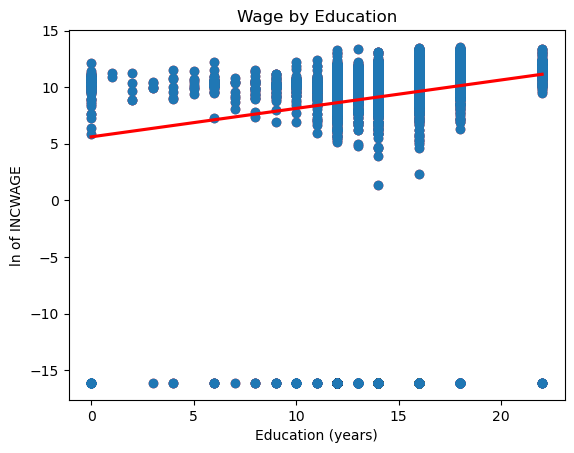

In [36]:
sns.regplot(x = "EDUCDC", y = "INCWAGE_ln", data = df, ci = None, color = "red")
plt.scatter(x = "EDUCDC", y = "INCWAGE_ln", data = df)
plt.ylabel("ln of INCWAGE")
plt.xlabel("Education (years)")
plt.title("Wage by Education")

In [38]:
result = smf.ols('INCWAGE_ln ~ EDUCDC + female + AGE + age_sq + White + \
    Black + hispanic + married + NCHILD + vet', data = df).fit()
print(result.summary())

PatsyError: Error evaluating factor: NameError: name 'white' is not defined
    INCWAGE_ln ~ EDUCDC + female + AGE + age_sq + white +     black + hispanic + married + NCHILD + vet
                                                  ^^^^^

In [40]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'EDUCDC', 'hsdip',
       'coldip', 'hispanic', 'married', 'female', 'vet', 'hsdip_int',
       'coldip_int', 'age_sq', 'INCWAGE_ln', 'White', 'Black'],
      dtype='object')

educdc + β2 f emale + β3age + β4age2+ β5white + β6black + β8hispanic+ β9married + β10nchild + β11vet + ε,